### PROBLEM STATEMENT
* Netflix has become one of the most prominent global streaming platforms, continuously expanding its library with a mix of original productions and licensed content. However, with growing competition from platforms like Amazon Prime, Disney+, and regional OTT providers, Netflix must strategically analyze its content catalog to identify strengths, gaps, and opportunities.
* The specific problem to be addressed in this project is 'Content Trends Analysis for Strategic Recommendations'. The aim is to uncover how Netflix’s content distribution (Movies vs. TV Shows, genres, and country contributions) has evolved over the years. This will enable the identification of key genres, audience preferences, and strategic insights into global content expansion.

In [1]:
# Import essential libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




In [2]:
# Load the dataset (make sure netflix_titles.csv is in the same folder)
df = pd.read_csv("/content/Netflix Dataset.csv")




,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [20]:
# Display first few rows
df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Release_Year,Main_Country
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020.0,Brazil
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016.0,Mexico
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018.0,Singapore
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017.0,United States
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020.0,United States


In [3]:
# Check number of rows and columns
print("Rows:", df.shape[0])


Rows: 7789
Columns: 11
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


,0
Show_Id,0
Category,0
Title,0
Director,2388
Cast,718
Country,507
Release_Date,10
Rating,7
Duration,0
Type,0


In [23]:
print("Columns:", df.shape[1])

Columns: 13


In [21]:
# Get basic information about each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Show_Id       7789 non-null   object        
 1   Category      7789 non-null   object        
 2   Title         7789 non-null   object        
 3   Director      5401 non-null   object        
 4   Cast          7071 non-null   object        
 5   Country       7789 non-null   object        
 6   Release_Date  7691 non-null   datetime64[ns]
 7   Rating        7789 non-null   object        
 8   Duration      7789 non-null   object        
 9   Type          7789 non-null   object        
 10  Description   7789 non-null   object        
 11  Release_Year  7691 non-null   float64       
 12  Main_Country  7789 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(11)
memory usage: 791.2+ KB


In [22]:
# Check for missing values
df.isnull().sum()

,0
Show_Id,0
Category,0
Title,0
Director,2388
Cast,718
Country,0
Release_Date,98
Rating,0
Duration,0
Type,0


### DATA CLEANING
* Missing Country entries are replaced with "Unknown" so plots don’t break.

* Release_Date is converted to proper datetime, so we can extract the year.

* Release_Year helps in plotting trend lines by year.

In [6]:
# Fill missing country with 'Unknown'
df['Country'] = df['Country'].fillna('Unknown')


In [8]:
# Convert Release_Date to datetime
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')

In [9]:
# Extract Year from Release_Date
df['Release_Year'] = df['Release_Date'].dt.year

In [17]:
# Replace missing Ratings with 'Not Rated'
df['Rating'] = df['Rating'].fillna('Not Rated')

# Check cleaned data
df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Release_Year,Main_Country
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020.0,Brazil
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016.0,Mexico
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018.0,Singapore
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017.0,United States
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020.0,United States


In [18]:
# Count of Movies vs TV Shows
df['Category'].value_counts()


,count
Category,
Movie,5379
TV Show,2410


### EDA Findings

Based on the Exploratory Data Analysis, we can observe the following:

*   **Movies vs TV Shows:** The distribution of content on Netflix shows a higher number of Movies compared to TV Shows.
*   **Content Releases by Year:** The number of content releases has significantly increased over the years, with a noticeable surge in recent years, indicating a rapid expansion of Netflix's library.
*   **Top Content-Producing Countries:** The United States is the leading country in producing content for Netflix, followed by India and the United Kingdom. There is also a significant portion of content with 'Unknown' country information.
*   **Top Genres/Types:** The most prevalent content types on Netflix are International Movies, Dramas, and Comedies, suggesting a strong focus on these genres.
*   **Year-wise Trend:** The line plot shows a clear upward trend in the release of both Movies and TV Shows over the years, with a particularly steep increase from 2016 onwards for both categories.

/tmp/ipython-input-2646946548.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Category', data=df, palette='pastel')


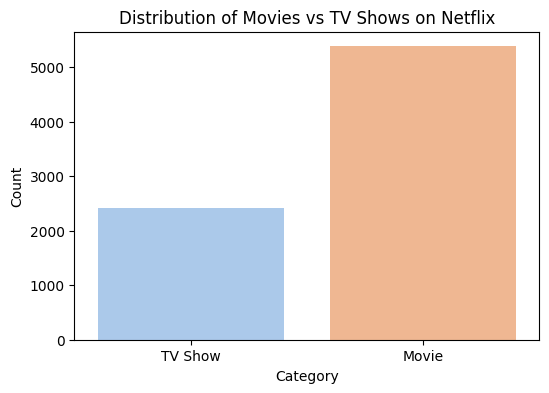

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(x='Category', data=df, palette='pastel')
plt.title('Distribution of Movies vs TV Shows on Netflix')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()


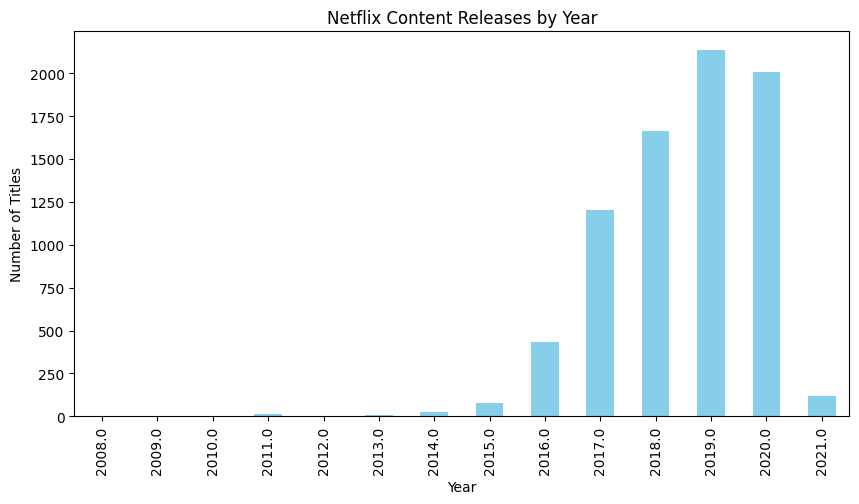

In [11]:
# Count number of releases each year
content_by_year = df['Release_Year'].value_counts().sort_index()

plt.figure(figsize=(10,5))
content_by_year.plot(kind='bar', color='skyblue')
plt.title('Netflix Content Releases by Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.show()

/tmp/ipython-input-3771123874.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='mako')


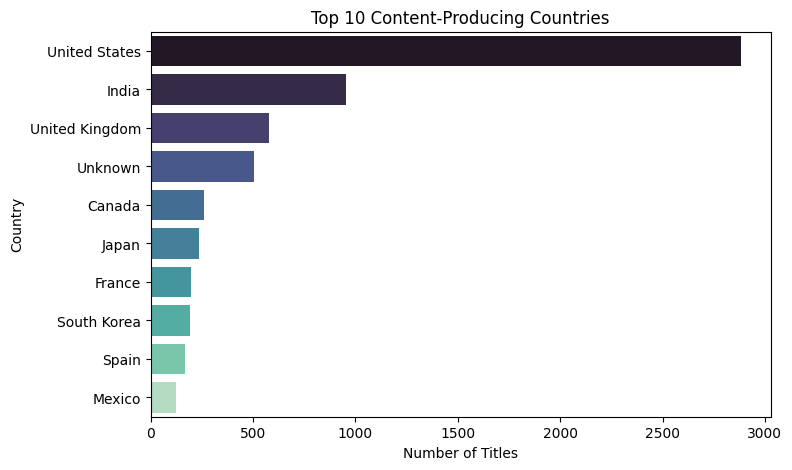

In [12]:
# Some rows have multiple countries — take the first one
df['Main_Country'] = df['Country'].apply(lambda x: x.split(',')[0])

top_countries = df['Main_Country'].value_counts().head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='mako')
plt.title('Top 10 Content-Producing Countries')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()


/tmp/ipython-input-656289616.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='muted')


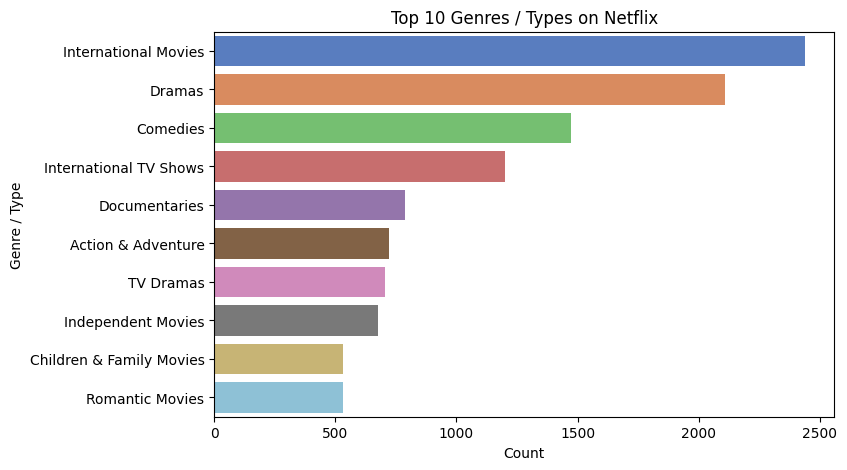

In [13]:
# Split genres and count
genres = df['Type'].dropna().str.split(',').explode().str.strip()
top_genres = genres.value_counts().head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='muted')
plt.title('Top 10 Genres / Types on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre / Type')
plt.show()


<Figure size 1000x600 with 0 Axes>

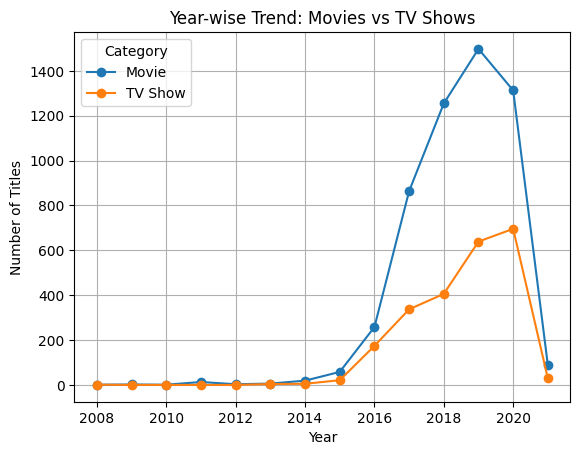

In [14]:
# Group by year and category
year_category = df.groupby(['Release_Year', 'Category']).size().unstack(fill_value=0)

plt.figure(figsize=(10,6))
year_category.plot(kind='line', marker='o')
plt.title('Year-wise Trend: Movies vs TV Shows')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.show()


In [15]:
df.to_csv("netflix_cleaned.csv", index=False)
print("✅ Cleaned dataset saved successfully!")


✅ Cleaned dataset saved successfully!
